# Priority Queues

## Agenda

1. Motives
2. Naive implementation
2. Heaps
    - Mechanics
    - Implementation
    - Run-time Analysis
3. Heapsort

## 1. Motives

Prior to stacks & queues, the sequential data structures we implemented imposed an observable total ordering on all its elements, which were also individually accessible (e.g., by index).

Stacks & Queues restrict access to elements (to only 1 insertion/deletion point), thereby simplifying their implementation. They don't, however, alter the order of the inserted elements.

Data structures that impose a total ordering are useful — e.g., one that maintains all elements in sorted order at all times might come in handy — but their design and implementation are necessarily somewhat complicated. We'll get to them, but before that ...

Is there a middle ground? I.e., is there a place for a data structure that restricts access to its elements, yet maintains an implied (though not necessary total) ordering?

### "Priority Queue"

Like a queue, a priority queue has a restricted API, but each element has an implicit "priority", such that the element with the highest ("max") priority is always dequeued, regardless of the order in which it was enqueued.

## 2. Naive implementation

In [1]:
class PriorityQueue:
    def __init__(self):
        self.data = []
        
    def add(self, x): # O(N)
        i = 0 # O(N)
        while i < len(self.data) and self.data[i] < x: # And short circuits if the left condition is false
            i+=1   
        # Replacing above loop with binary search yelds O(log N) but have to add O(N) from below anyways
        self.data.insert(i, x) # O(N)
        #self.data.append(x) # O(1)
        #self.data.sort() # O(N log N) linearithmic sort
        
    def max(self): # O(1)
        return self.data[-1]

    def pop_max(self): # O(1)
        r = self.data[-1]
        del self.data[-1]
        return r
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [2]:
pq = PriorityQueue()

In [3]:
import random
for _ in range(10):
    pq.add(random.randrange(100))

In [4]:
pq

[9, 10, 10, 27, 76, 78, 88, 88, 96, 97]

In [5]:
while pq:
    print(pq.pop_max())

97
96
88
88
78
76
27
10
10
9


## 3. Heaps

### Mechanics


In an ordered, linear structure, inserting an element changes the positions of all of its successors, which include all elements at higher indices (positions).
Reframing the problem: how can we reduce the number of successors of elements as we move through them? (Consider analogy: we don't think of all the organisms in the world as belonging to one gigantic, linear list! How do we reduce the number we have to consider when thinking about certain characteristics?)
Use a hierarchical structure! A tree, binary.  Filled in top to bottom, left to right

### Implementation

In [33]:
class Heap:
    def __init__(self):
        self.data = []
        
    @staticmethod # The instance doesn't matter, thus it doesn't pass self. The instance is not relevant to method
    def _left(idx):
        return (2*idx+1)
    
    @staticmethod
    def _right(idx):
        return 2*idx+2
    
    @staticmethod
    def _parent(idx):
        return (idx-1)//2

    def add(self, x):
        self.data.append(x) # O(1
        i = len(self.data)-1
        
        while i > 0: # O(log N)
            p = Heap._parent(i)
            if self.data[p] < self.data[i]:
                self.data[i],self.data[p] = self.data[p], self.data[i]
                i = p
            else:
                break
    
    def max(self):
        return self.data[0]

    def _heapify(self, idx = 0):
        while True:
            l = Heap._left(idx)
            r = Heap._right(idx)
            maxidx = idx
            if l < len(self) and self.data[l] > self.data[idx]:
                maxidx = l
            if r < len(self) and self.data[r] > self.data[maxidx]:
                maxidx = r
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break
    
    def pop_max(self): # O(log N)
        r = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1] # O(1)
        # Re-establish the "heap property"
        self._heapify() # O(log N)
        return r
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [46]:
h = Heap()

In [47]:
import random
for _ in range(10):
    h.add(random.randrange(100))

In [48]:
h

[95, 83, 81, 51, 75, 22, 29, 3, 5, 7]

In [37]:
while h:
    print(h.pop_max())

75
75
48
45
45
34
32
26
12
6


### Run-time Analysis

## 4. Heapsort

In [56]:
def heapsort(iterable):
    heap = Heap() # O(NlogN) (Linearithmic)
    for x in iterable:
        heap.add(x)
    lst = []
    while heap: # O(N log N)
        m = heap.pop_max() # O(log N)
        lst.append(m)
    lst.reverse() # O(N)
    return lst

In [57]:
l = [12,3,4,2,345,234,5,6,43,1]

In [58]:
heapsort(l) # O(N log N)

[1, 2, 3, 4, 5, 6, 12, 43, 234, 345]

In [59]:
import random

def pairs(iterable):
    it = iter(iterable)
    a = next(it)
    while True:
        b = next(it)
        yield a,b
        a = b

lst = heapsort(random.random() for _ in range(1000))
all((a <= b) for a, b in pairs(lst))

True

In [60]:
import timeit
def time_heapsort(n):
    return timeit.timeit('heapsort(rlst)',
                         'from __main__ import heapsort; '
                         'import random; '
                         'rlst = (random.random() for _ in range({}))'.format(n),
                         number=1000)

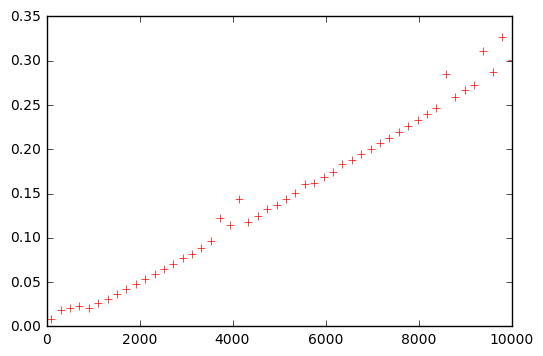

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.show()

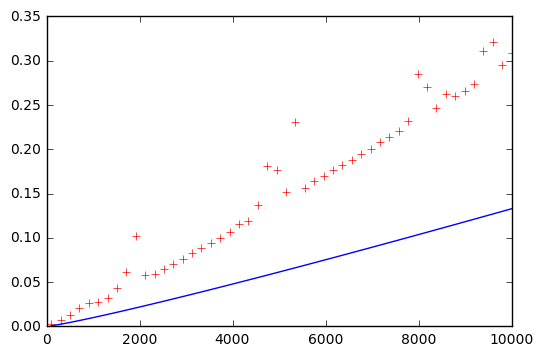

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'r+')
plt.plot(ns, ns*np.log2(ns)*0.01/10000, 'b') # O(n log n) plot
plt.show()